In [1]:
from pysolar.solar import *
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
lng, lat = -71.042093, 42.337196

In [3]:
class UTC(datetime.tzinfo):
    """UTC时区设置"""
    def __init__(self,offset = 0):
        self._offset = offset
    def utcoffset(self, dt):
        return datetime.timedelta(hours=self._offset)
    def tzname(self, dt):
        return "UTC +%s" % self._offset
    def dst(self, dt):
        return datetime.timedelta(hours=self._offset)

In [4]:
# 计算24小时的太阳高度及位置
altitude_and_azimuth = []
for h in range(24):
    for m in range(0,60,10):
        date_ = (2019, 6, 15)     # 请根据实际时间调整
        date_time = date_ + (h,m)
        date = datetime.datetime(*date_time,tzinfo=UTC(8))
        lng, lat = float(lng), float(lat)

        azimuth = get_azimuth(lat, lng, date)   # 计算太阳方位角
        altitude = get_altitude(lat, lng, date) # 计算太阳高度角
        altitude_and_azimuth.append([h,m,altitude,azimuth])

In [5]:
altitude_and_azimuth

[[0, 0, 68.82087295922112, 150.70064934108962],
 [0, 10, 69.63946723307733, 156.75254554668882],
 [0, 20, 70.2729344648654, 163.1944502824598],
 [0, 30, 70.70265230270313, 169.9501025160224],
 [0, 40, 70.91459954057441, 176.90791237557963],
 [0, 50, 70.90140316240246, 183.93041282088154],
 [1, 0, 70.66353398659261, 190.8713229743368],
 [1, 10, 70.20922800927052, 197.5954358772588],
 [1, 20, 69.5531621902504, 203.99497802624776],
 [1, 30, 68.71434866705789, 209.99802419169484],
 [1, 40, 67.71387556705102, 215.5684624322799],
 [1, 50, 66.57299648403722, 220.7000451373871],
 [2, 0, 65.31179902096677, 225.40800382273665],
 [2, 10, 63.94845253172982, 229.72089533052818],
 [2, 20, 62.49890906597829, 233.67405347446956],
 [2, 30, 60.976902999567784, 237.3049759690672],
 [2, 40, 59.394118099094435, 240.65041333568405],
 [2, 50, 57.76042884773476, 243.7447375239429],
 [3, 0, 56.084161648974344, 246.6191727546544],
 [3, 10, 54.37234069172405, 249.30157158479236],
 [3, 20, 52.63090992721545, 251.

In [6]:
# 将列表转化为pd格式
df = pd.DataFrame(altitude_and_azimuth,columns=['hour','minute','altitude','azimuth'])
df

,hour,minute,altitude,azimuth
0,0,0,68.820873,150.700649
1,0,10,69.639467,156.752546
2,0,20,70.272934,163.194450
3,0,30,70.702652,169.950103
4,0,40,70.914600,176.907912
...,...,...,...,...
139,23,10,62.674492,126.646010
140,23,20,64.117770,130.632356
141,23,30,65.473500,134.982888
142,23,40,66.725488,139.732814


In [19]:
# 筛选太阳高度大于0 白天的时间
dfx = df[df['altitude'] > 0]
dfx

,hour,minute,altitude,azimuth
0,0,0,68.820873,150.700649
1,0,10,69.639467,156.752546
2,0,20,70.272934,163.194450
3,0,30,70.702652,169.950103
4,0,40,70.914600,176.907912
...,...,...,...,...
139,23,10,62.674492,126.646010
140,23,20,64.117770,130.632356
141,23,30,65.473500,134.982888
142,23,40,66.725488,139.732814


In [20]:
# 将太阳方位和高度 角度转弧度
dfx['altitude_r'] = (dfx['altitude'] / 360) * 2 * np.pi
dfx['azimuth_r'] = (dfx['azimuth'] / 360) * 2 * np.pi

D:\anaconda\envs\geopandas\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\anaconda\envs\geopandas\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [21]:
# 重设索引值
dfx = dfx.reset_index()
dfx

,index,hour,minute,altitude,azimuth,altitude_r,azimuth_r
0,0,0,0,68.820873,150.700649,1.201151,2.630223
1,1,0,10,69.639467,156.752546,1.215438,2.735848
2,2,0,20,70.272934,163.194450,1.226494,2.848280
3,3,0,30,70.702652,169.950103,1.233994,2.966189
4,4,0,40,70.914600,176.907912,1.237693,3.087626
...,...,...,...,...,...,...,...
87,139,23,10,62.674492,126.646010,1.093876,2.210390
88,140,23,20,64.117770,130.632356,1.119066,2.279965
89,141,23,30,65.473500,134.982888,1.142728,2.355896
90,142,23,40,66.725488,139.732814,1.164579,2.438798


In [10]:
# 绘制极坐标图
# 获取太阳方位和高度 作为xy坐标
altitude = dfx['altitude'].values
azimuth_r = dfx['azimuth_r'].values

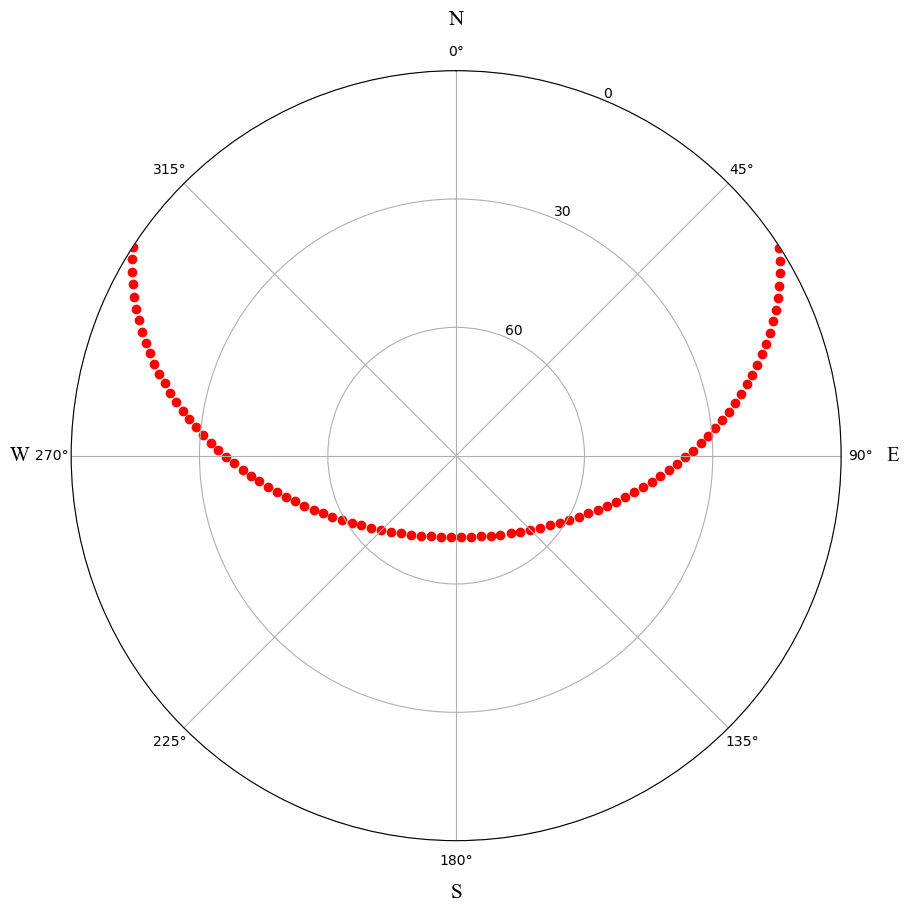

In [25]:
fig,ax = plt.subplots(subplot_kw={'projection':'polar'},figsize=(10,10))

# 设置y轴的范围
ax.set_ylim(0,90)
# 反转y轴的数值
ax.invert_yaxis()
# 设置y轴的刻度
ax.set_yticks([0,30,60])
# 设置顺时针为正方形
ax.set_theta_direction(-1)
# 将0刻度设置为朝向N
ax.set_theta_zero_location('N')
# 第一个参数是长度 第二个是参数是角度
ax.scatter(azimuth_r,altitude,marker='o',color='red')

for i,v in enumerate(['N','E','S','W']):
    ax.text(i*0.5*np.pi,-12,v,va='center',ha='center',fontsize=15,fontfamily='Times New Roman')

# 保存图片    
plt.savefig('./test.jpg')